## Imports

In [3]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import tensorflow as tf

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## Reading Data

In [4]:
data=pd.read_csv('data/cleaned_data.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,training_hours,target
0,0.290630,-0.709899,0.675759,-0.707743,0.343440,1.259774,0.020598,0.025648,-0.885069,-1.165017,0.873874,-0.484634,1.0
1,0.290630,1.557480,0.675759,-0.707743,0.343440,-1.076863,0.608192,0.657572,1.009462,0.912796,-0.220221,-0.300025,0.0
2,0.041947,1.557480,-1.751047,-0.707743,0.343440,0.325119,-0.003226,-0.128875,1.956727,0.537636,-1.375099,0.304151,0.0
3,-0.286705,1.557480,-0.563573,-0.707743,-4.215534,1.103998,-0.031022,0.657572,1.956727,-0.905291,-0.121448,-0.216112,1.0
4,0.290630,-0.709899,0.675759,1.475616,0.343440,1.259774,0.608192,-2.856637,0.535829,0.133616,-0.288602,-0.954548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,0.290630,-0.709899,0.315881,1.475616,0.343440,-1.123064,0.608192,-2.458532,-0.885069,0.537636,-1.375099,-0.686026,1.0
28758,0.290630,1.557480,0.675759,1.100064,0.343440,-0.297984,0.280621,0.657572,-0.885069,0.537636,-1.375099,1.316346,1.0
28759,0.198238,1.557480,-0.847634,-0.022457,0.259114,0.267129,-0.006670,-0.070482,1.956727,0.548379,-0.597283,0.293616,1.0
28760,0.290630,-0.314939,0.675759,-0.707743,0.343440,-0.948222,0.006945,0.026612,0.618332,-1.236512,0.666819,0.639804,1.0


In [6]:
X_train, X_eval, y_train, y_eval = train_test_split(data[data.columns[:-1]],data['target'], test_size=0.30, random_state=101)

## Implementing Models

In [7]:
accuracy_dict={}
f1_dict={}

### 1. Naive bayes

In [8]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

#### Inference and Score

In [9]:
y_pred_train_GNB=GNB.predict(X_train)
y_pred_eval_GNB=GNB.predict(X_eval)
accuracy_eval_GNB=accuracy_score(y_eval, y_pred_eval_GNB)
accuracy_dict['GNB']=accuracy_eval_GNB
f1_dict['GNB']=f1_score(y_eval, y_pred_eval_GNB)
print(f'Accuracy Score on Train Data: {accuracy_score(y_train, y_pred_train_GNB):0.4f}')
print(f'Accuracy Score on Eval Data: {accuracy_eval_GNB:0.4f}')

Accuracy Score on Train Data: 0.6845
Accuracy Score on Eval Data: 0.6819


In [10]:
print(classification_report(y_eval,y_pred_eval_GNB))

              precision    recall  f1-score   support

         0.0       0.69      0.66      0.68      4346
         1.0       0.67      0.71      0.69      4283

    accuracy                           0.68      8629
   macro avg       0.68      0.68      0.68      8629
weighted avg       0.68      0.68      0.68      8629



### 2. KNN MODEL

In [11]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

#### Inference and Score

In [12]:
y_pred_train_KNN=KNN.predict(X_train)
y_pred_eval_KNN=KNN.predict(X_eval)
accuracy_eval_KNN=accuracy_score(y_eval, y_pred_eval_KNN)
accuracy_dict['KNN']=accuracy_eval_KNN
f1_dict['KNN']=f1_score(y_eval, y_pred_eval_KNN)
print(f'Accuracy Score on Train Data: {accuracy_score(y_train, y_pred_train_KNN):0.4f}')
print(f'Accuracy Score on Eval Data: {accuracy_eval_KNN:0.4f}')

Accuracy Score on Train Data: 0.8498
Accuracy Score on Eval Data: 0.7720


In [13]:
print(classification_report(y_eval,y_pred_eval_KNN))

              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76      4346
         1.0       0.74      0.83      0.78      4283

    accuracy                           0.77      8629
   macro avg       0.78      0.77      0.77      8629
weighted avg       0.78      0.77      0.77      8629



### 3. Logistic regresssion

In [14]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

#### Inference and Score

In [15]:
y_pred_train_LR=LR.predict(X_train)
y_pred_eval_LR=LR.predict(X_eval)
accuracy_eval_LR=accuracy_score(y_eval, y_pred_eval_LR)
accuracy_dict['LR']=accuracy_eval_LR
f1_dict['LR']=f1_score(y_eval, y_pred_eval_LR)
print(f'Accuracy Score on Train Data: {accuracy_score(y_train, y_pred_train_LR):0.4f}')
print(f'Accuracy Score on Eval Data: {accuracy_eval_LR:0.4f}')

Accuracy Score on Train Data: 0.6894
Accuracy Score on Eval Data: 0.6915


In [16]:
print(classification_report(y_eval,y_pred_eval_LR))

              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70      4346
         1.0       0.70      0.66      0.68      4283

    accuracy                           0.69      8629
   macro avg       0.69      0.69      0.69      8629
weighted avg       0.69      0.69      0.69      8629



### 4. Decison tree

In [17]:
DT = DecisionTreeClassifier(criterion='entropy',random_state=0) 
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Inference and Score

In [18]:
y_pred_train_DT=DT.predict(X_train)
y_pred_eval_DT=DT.predict(X_eval)
accuracy_eval_DT=accuracy_score(y_eval, y_pred_eval_DT)
accuracy_dict['DT']=accuracy_eval_DT
f1_dict['DT']=f1_score(y_eval, y_pred_eval_DT)
print(f'Accuracy Score on Train Data: {accuracy_score(y_train, y_pred_train_DT):0.4f}')
print(f'Accuracy Score on Eval Data: {accuracy_eval_DT:0.4f}')

Accuracy Score on Train Data: 0.9994
Accuracy Score on Eval Data: 0.7979


In [19]:
print(classification_report(y_eval,y_pred_eval_DT))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      4346
         1.0       0.79      0.81      0.80      4283

    accuracy                           0.80      8629
   macro avg       0.80      0.80      0.80      8629
weighted avg       0.80      0.80      0.80      8629



### 5. XGB Classifier

In [20]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Inference and Score

In [21]:
y_pred_train_XGB=XGB.predict(X_train)
y_pred_eval_XGB=XGB.predict(X_eval)
accuracy_eval_XGB=accuracy_score(y_eval, y_pred_eval_XGB)
accuracy_dict['XGB']=accuracy_eval_XGB
f1_dict['XGB']=f1_score(y_eval, y_pred_eval_XGB)
print(f'Accuracy Score on Train Data: {accuracy_score(y_train, y_pred_train_XGB):0.4f}')
print(f'Accuracy Score on Eval Data: {accuracy_eval_XGB:0.4f}')

Accuracy Score on Train Data: 0.9247
Accuracy Score on Eval Data: 0.8617


In [22]:
print(classification_report(y_eval,y_pred_eval_XGB))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      4346
         1.0       0.87      0.85      0.86      4283

    accuracy                           0.86      8629
   macro avg       0.86      0.86      0.86      8629
weighted avg       0.86      0.86      0.86      8629



### 6. Random Forest

In [23]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)

RandomForestClassifier()

#### Inference and Score

In [24]:
y_pred_train_RF=RF.predict(X_train)
y_pred_eval_RF=RF.predict(X_eval)
accuracy_eval_RF=accuracy_score(y_eval, y_pred_eval_RF)
accuracy_dict['RF']=accuracy_eval_RF
f1_dict['RF']=f1_score(y_eval, y_pred_eval_RF)
print(f'Accuracy Score on Train Data: {accuracy_score(y_train, y_pred_train_RF):0.4f}')
print(f'Accuracy Score on Eval Data: {accuracy_eval_RF:0.4f}')

Accuracy Score on Train Data: 0.9994
Accuracy Score on Eval Data: 0.8607


In [25]:
print(classification_report(y_eval,y_pred_eval_RF))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      4346
         1.0       0.86      0.86      0.86      4283

    accuracy                           0.86      8629
   macro avg       0.86      0.86      0.86      8629
weighted avg       0.86      0.86      0.86      8629



### 7. Light Gradient Boosting

In [26]:
LGB = LGBMClassifier()
LGB.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 10098, number of negative: 10035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3040
[LightGBM] [Info] Number of data points in the train set: 20133, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501565 -> initscore=0.006258
[LightGBM] [Info] Start training from score 0.006258


LGBMClassifier()

#### Inference and Score

In [27]:
y_pred_train_LGB=LGB.predict(X_train)
y_pred_eval_LGB=LGB.predict(X_eval)
accuracy_eval_LGB=accuracy_score(y_eval, y_pred_eval_LGB)
accuracy_dict['LGB']=accuracy_eval_LGB
f1_dict['LGB']=f1_score(y_eval, y_pred_eval_LGB)
print(f'Accuracy Score on Train Data: {accuracy_score(y_train, y_pred_train_LGB):0.4f}')
print(f'Accuracy Score on Eval Data: {accuracy_eval_LGB:0.4f}')

Accuracy Score on Train Data: 0.8839
Accuracy Score on Eval Data: 0.8635


In [28]:
print(classification_report(y_eval,y_pred_eval_LGB))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      4346
         1.0       0.86      0.87      0.86      4283

    accuracy                           0.86      8629
   macro avg       0.86      0.86      0.86      8629
weighted avg       0.86      0.86      0.86      8629



### 8. Artificial Neural network

In [29]:
ANN_model=tf.keras.models.Sequential()
ANN_model.add(tf.keras.layers.Dense(units=64, activation="relu"))
ANN_model.add(tf.keras.layers.Dense(units=32, activation="relu"))
ANN_model.add(tf.keras.layers.Dense(units=8, activation="relu"))
# ANN_model.add(tf.keras.layers.Dense(units=12, activation="relu"))
ANN_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
ANN_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [30]:
ANN_model.compile(optimizer='Adagrad', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [31]:
_=ANN_model.fit(X_train, y_train, 
              batch_size=32, 
              epochs=100, verbose=0)

#### Inference and Score

In [32]:
y_pred_train_ANN=ANN_model.predict(X_train)
y_pred_train_ANN[y_pred_train_ANN >= 0.5]=1
y_pred_train_ANN[y_pred_train_ANN < 0.5]=0

y_pred_eval_ANN=ANN_model.predict(X_eval)
y_pred_eval_ANN[y_pred_eval_ANN >= 0.5]=1
y_pred_eval_ANN[y_pred_eval_ANN < 0.5]=0

accuracy_eval_ANN=accuracy_score(y_eval, y_pred_eval_ANN)
accuracy_dict['ANN']=accuracy_eval_ANN
f1_dict['ANN']=f1_score(y_eval, y_pred_eval_ANN)
print(f'Accuracy Score on Train Data: {accuracy_score(y_train, y_pred_train_ANN):0.4f}')
print(f'Accuracy Score on Eval Data: {accuracy_eval_ANN:0.4f}')

630/630 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
Accuracy Score on Train Data: 0.7365
Accuracy Score on Eval Data: 0.7310


In [33]:
print(classification_report(y_eval,y_pred_eval_ANN))

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73      4346
         1.0       0.73      0.74      0.73      4283

    accuracy                           0.73      8629
   macro avg       0.73      0.73      0.73      8629
weighted avg       0.73      0.73      0.73      8629



## Comparing Models

C:\Users\1999y\AppData\Local\Temp\ipykernel_5512\2771869202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(accuracy_dict, palette=sns.color_palette("hls", len(accuracy_dict)))


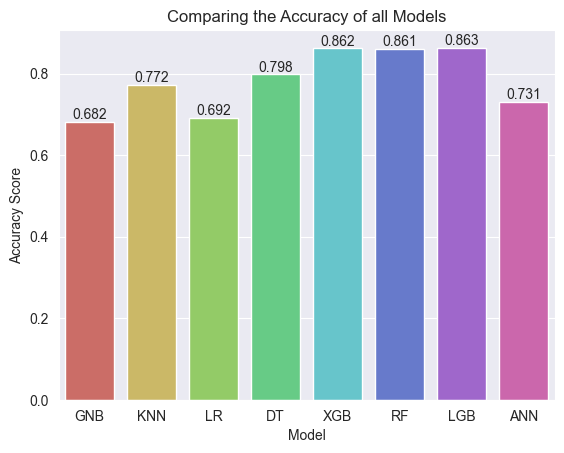

In [34]:
sns.set_style("darkgrid")
ax=sns.barplot(accuracy_dict, palette=sns.color_palette("hls", len(accuracy_dict)))
ax.set_title('Comparing the Accuracy of all Models')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')


for idx, value in enumerate(accuracy_dict.values()):
    ax.text(idx, value, f'{value:.3f}', ha='center', va='bottom')

C:\Users\1999y\AppData\Local\Temp\ipykernel_5512\3233737206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(f1_dict, palette=sns.color_palette("hls", len(f1_dict)))


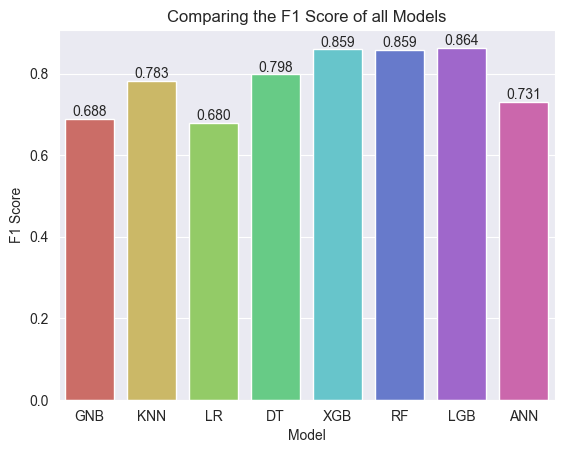

In [47]:
sns.set_style("darkgrid")
ax=sns.barplot(f1_dict, palette=sns.color_palette("hls", len(f1_dict)))
ax.set_title('Comparing the F1 Score of all Models')
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')


for idx, value in enumerate(f1_dict.values()):
    ax.text(idx, value, f'{value:.3f}', ha='center', va='bottom')